In [38]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

In [115]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [117]:
len(x_train)

60000

In [119]:
x_train[0].shape

(28, 28)

In [41]:
len(x_test)

10000

In [121]:
x_test.shape

(10000, 28, 28)

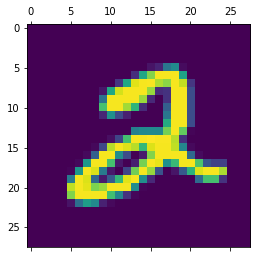

In [142]:
plt.matshow(x_train[5])

In [143]:
y_train[10]

3

In [45]:
y_train[:6]


array([5, 0, 4, 1, 9, 2], dtype=uint8)

In [46]:
x_train.shape

(60000, 28, 28)

In [47]:
x_test.shape

(10000, 28, 28)

In [144]:
x_train = x_train/255
x_test = x_test/255

### Now let's build CNN 

In [145]:
x_train = x_train.reshape(-1,28,28,1)

In [146]:
x_train.shape

(60000, 28, 28, 1)

In [147]:
x_train[:5]

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [148]:
cnn = keras.models.Sequential([
    #CNN 
    keras.layers.Conv2D(filters=32, kernel_size = (3,3),activation='relu', input_shape = (28,28,1)),
    keras.layers.MaxPool2D((2,2)),
    
    ##Dense
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
    
])

In [149]:
cnn.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])

In [150]:
cnn.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1884 - accuracy: 0.94471s - loss: 0.1917 - accuracy: 0. -
Epoch 2/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0664 - accuracy: 0.9800
Epoch 3/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0466 - accuracy: 0.9857
Epoch 4/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0351 - accuracy: 0.98900s - loss: 0.0352 - accuracy
Epoch 5/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0252 - accuracy: 0.9918


In [151]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0500 - accuracy: 0.9838


[0.05000826716423035, 0.9837999939918518]

In [152]:
y_pred = cnn.predict(x_test)

In [153]:
y_pred = [np.argmax(element) for element in y_pred]

In [154]:
from sklearn.metrics import confusion_matrix , classification_report
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.98      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.96      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [158]:
y_pred[:10]


[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [157]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)